In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv('Phishing_Email.csv')
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# checking for null values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [ ]:
# dropping the column 'Unnamed' and null values
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)

In [ ]:
# after removing null values
df.isna().sum()

,0
Email Text,0
Email Type,0


In [ ]:
# checking for duplicates
df.duplicated().sum()

1096

In [ ]:
# dropping them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17538 entries, 0 to 18648
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17538 non-null  object
 1   Email Type  17538 non-null  object
dtypes: object(2)
memory usage: 411.0+ KB


In [ ]:
df.shape

(17538, 2)

In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


Text(0, 0.5, 'count')

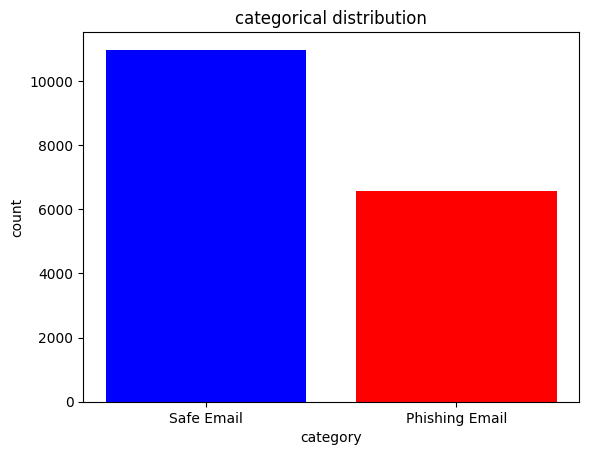

In [ ]:
index=df['Email Type'].value_counts().index
values=df['Email Type'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title('categorical distribution')
plt.xlabel('category')
plt.ylabel('count')

In [ ]:
# encoding the categorical to numerical using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Email Type']=le.fit_transform(df['Email Type'])

In [ ]:
le.classes_

array(['Phishing Email', 'Safe Email'], dtype=object)

In [ ]:
df['Email Text'][0]

're : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' ( although perhaps these

In [ ]:
# converting text to lower to ensure uniformity
df["Email Text"]=df["Email Text"].str.lower()
df["Email Text"].head()

,Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...
3,\nhello i am your hot lil horny toy.\n i am...
4,software at incredibly low prices ( 86 % lower...


In [ ]:
import string
# removing punctuation and other symbols
translator=str.maketrans('','',string.punctuation)
df["Email Text"]=df["Email Text"].apply(lambda x : x.translate(translator))
df["Email Text"].head()

,Email Text
0,re 6 1100 disc uniformitarianism re 1086...
1,the other side of galicismos galicismo is ...
2,re equistar deal tickets are you still availa...
3,\nhello i am your hot lil horny toy\n i am ...
4,software at incredibly low prices 86 lower ...


In [ ]:
# Removing hyperlinks, punctuations, extra space¶
import re
def preprocess_text(text):
    # Removing hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [ ]:
df["Email Text"].head()

,Email Text
0,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of galicismos galicismo is a sp...
2,re equistar deal tickets are you still availab...
3,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices 86 lower dra...


In [ ]:
df["Email Text"][0] # after cleaning the text

're 6 1100 disc uniformitarianism re 1086 sex lang dick hudson s observations on us use of s on but not d aughter as a vocative are very thoughtprovoking but i am not sure that it is fair to attribute this to sons being treated like senior relatives for one thing we do nt normally use brother in this way any more than we do d aughter and it is hard to imagine a natural class comprising senior relatives and s on but excluding brother for another there seem to me to be differences here if i am not imagining a distinction that is not there it seems to me that the senior relative terms are used in a wider variety of contexts e g calling out from a distance to get someone s attention and hence at the beginning of an utterance whereas s on seems more natural in utterances like yes son hand me that son than in ones like son or son help me although perhaps these latter ones are not completely impossible alexis mr'

In [ ]:
df.head() # safe - 1 , phishing - 0

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


In [ ]:
!pip install wordcloud

A WordCloud is a visual representation of the most common words in a text, with the size of each word indicating its frequency or importance.


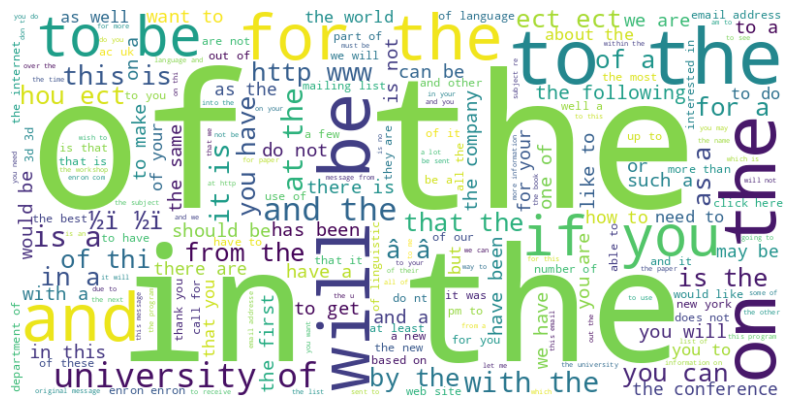

In [ ]:
# WordCloud of available stopwords
from wordcloud import WordCloud

#combining all rows into a single string
all_mails = " ".join(df['Email Text'])

#creating a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

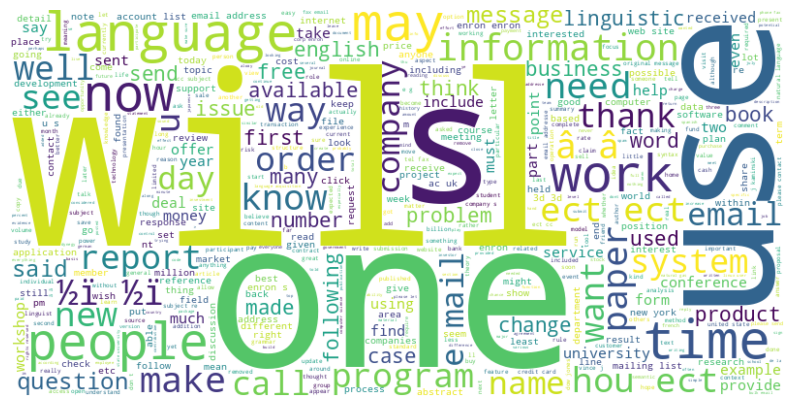

In [ ]:
# wordcloud of unique words
all_mails = " ".join(df['Email Text'])
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


In [ ]:
# adding gain and loss cues by using some keywords
Gain_labels=["You’ve earned","As a thank you","Exclusive offer","Gift for you","We appreciate your loyalty","Act now to receive",
             "Join us","Commitment to you","Once you decide","Continue enjoying","Your agreement is important","Confirm your participation",
             "Trusted by others","Recommended by friends","We care about you","Join our community","People love this","You deserve the best"]
Loss_labels=["Last chance","Don’t miss out","Limited time offer","Your account will be suspended","Urgent action required","Immediate response needed",
             "Serious consequences","Potential loss of service","Critical issues with your account","Immediate risk of data loss","Severe penalties","Loss of access"
             "Act fast","Deadline approaching","Response required today","Immediate action necessary","Time-sensitive","Urgent response needed"]
def flag_email(text):
    gain_found = any(label.lower() in text for label in Gain_labels)
    loss_found = any(label.lower() in text for label in Loss_labels)

    if gain_found and loss_found:
        return "both"
    elif gain_found:
        return "gain"
    elif loss_found:
        return "loss"
    else:
        return "neutral"
df['Persuasion Cues'] = df['Email Text'].apply(flag_email)
df.head()

,Email Text,Email Type,Persuasion Cues
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1,neutral
1,the other side of galicismos galicismo is a sp...,1,neutral
2,re equistar deal tickets are you still availab...,1,neutral
3,hello i am your hot lil horny toy i am the one...,0,neutral
4,software at incredibly low prices 86 lower dra...,0,neutral


In [ ]:
df['Persuasion Cues'].value_counts()

,count
Persuasion Cues,
neutral,17332
gain,131
loss,71
both,4


In [ ]:
flagged_df=df[(df['Persuasion Cues']=='gain')|(df['Persuasion Cues']=='loss')]
flagged_df.reset_index(drop=True, inplace=True)

In [ ]:
flagged_df.head()

,Email Text,Email Type,Persuasion Cues
0,digital publishing tools free software alert p...,0,loss
1,the permanent fix to penis enlargement limited...,0,loss
2,fw ceraweek 2002 special notice timing is real...,1,gain
3,management announcement as you are all aware e...,1,gain
4,publish like a professional publish like a pro...,0,loss


In [ ]:
flagged_df.shape

(202, 3)

In [ ]:
# encoding the column 'Persuasion Cues'
sample_df = flagged_df.copy()
le=LabelEncoder()
sample_df['Persuasion Cues']=le.fit_transform(sample_df['Persuasion Cues'])

In [ ]:
le.classes_

array(['gain', 'loss'], dtype=object)

In [ ]:
sample_df['Persuasion Cues'].value_counts() # gain - 0 , loss - 1

,count
Persuasion Cues,
0,131
1,71


A Bi-LSTM processes the input sequence in both forward and backward directions, helping the model learn context from both past and future tokens.<br>
The sample df is fitted into a bidirectional
long short-term memory model (Bi-LSTM) to generate prediction of persuasion labels of gain and loss
for the full dataset

In [ ]:
# fitting the sample_df which contain persuasion cues to Bi-LSTM model
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()
# creates a vocabulary from our text . each unique word is assigned a intger based on the frequency.
tokenizer.fit_on_texts(sample_df['Email Text'])
# converts the text into sequences based on vocabulary generated above
sequences = tokenizer.texts_to_sequences(sample_df['Email Text'])
max_length = max(len(x) for x in sequences)
# padding the shorter sequences with 0 because LSTMs expect sequences of uniform length.
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Defining model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # choosing an dimension

# Creating the Bi-LSTM model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
X = padded_sequences
y = sample_df['Persuasion Cues']

model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 86s 13s/step - accuracy: 0.5282 - loss: 0.6967 - val_accuracy: 0.6829 - val_loss: 0.6626
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 14s/step - accuracy: 0.6527 - loss: 0.6550 - val_accuracy: 0.6829 - val_loss: 0.6190
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 147s 15s/step - accuracy: 0.6801 - loss: 0.5994 - val_accuracy: 0.6829 - val_loss: 0.5842
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 134s 13s/step - accuracy: 0.6339 - loss: 0.5410 - val_accuracy: 0.8293 - val_loss: 0.5675
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 14s/step - accuracy: 0.7743 - loss: 0.5766 - val_accuracy: 0.8780 - val_loss: 0.4240
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 142s 14s/step - accuracy: 0.9880 - loss: 0.2879 - val_accuracy: 0.8780 - val_loss: 0.3449
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 140s 14s/step - accuracy: 1.0000 - loss: 0.1281 - val_accuracy: 0.9268 - val_loss: 0.2427
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 14s/step - accuracy: 1.0000 - loss: 0.0328 - val_accuracy: 0.9268 - val_loss: 0.2

In [ ]:
# predicting persuasion cues for larger dataset
new_sequences = tokenizer.texts_to_sequences(df['Email Text'])
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post')

predictions = model.predict(new_padded)
predicted_labels = np.where(predictions > 0.5, 1, 0)


549/549 ━━━━━━━━━━━━━━━━━━━━ 875s 2s/step


In [ ]:
# this is our final dataset
email_df=df.copy()
email_df['Persuasion Cues']=predicted_labels

In [ ]:
email_df.head() # safe - 0 , phish - 1

,Email Text,Email Type,Persuasion Cues
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1,0
1,the other side of galicismos galicismo is a sp...,1,1
2,re equistar deal tickets are you still availab...,1,0
3,hello i am your hot lil horny toy i am the one...,0,1
4,software at incredibly low prices 86 lower dra...,0,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words('english'))
def tokenize_and_remove_stopwords(text):
    # tokenized the text
    tokens=word_tokenize(text)
    # removing stop words
    filtered_tokens=[word for word in tokens if word not in stop_words]
    return filtered_tokens
email_df['Email Text']=df['Email Text'].apply(tokenize_and_remove_stopwords)

In [ ]:
email_df['Email Text'].head()

,Email Text
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ..."
1,"[side, galicismos, galicismo, spanish, term, n..."
2,"[equistar, deal, tickets, still, available, as..."
3,"[hello, hot, lil, horny, toy, one, dream, open..."
4,"[software, incredibly, low, prices, 86, lower,..."




1.   Stemming reduces a word to its base or root form, usually by removing suffixes. The resulting stemmed word may not always be a real word; rather, it’s a common root for various forms of the word
2.   Lemmatization also reduces words to their base or dictionary form, but with a focus on returning actual words that are linguistically correct. Lemmatization considers the word's context and part of speech (like verb or noun) to produce a valid base form



In [ ]:
# performing stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemm_the_data(data):
    return [ps.stem(word) for word in data]
stemmed_df=email_df.copy()
stemmed_df['Email Text']=email_df['Email Text'].apply(stemm_the_data)
stemmed_df['Email Text'].head()

,Email Text
0,"[6, 1100, disc, uniformitarian, 1086, sex, lan..."
1,"[side, galicismo, galicismo, spanish, term, na..."
2,"[equistar, deal, ticket, still, avail, assist,..."
3,"[hello, hot, lil, horni, toy, one, dream, open..."
4,"[softwar, incred, low, price, 86, lower, drape..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize_the_data(data):
    return [lemmatizer.lemmatize(word) for word in data]
lemmatized_df=email_df.copy()
lemmatized_df['Email Text']=lemmatized_df['Email Text'].apply(lemmatize_the_data)
lemmatized_df['Email Text'].head()

,Email Text
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ..."
1,"[side, galicismos, galicismo, spanish, term, n..."
2,"[equistar, deal, ticket, still, available, ass..."
3,"[hello, hot, lil, horny, toy, one, dream, open..."
4,"[software, incredibly, low, price, 86, lower, ..."



1.   Word2Vec model - A neural network-based model that transforms words into
     continuous vector space
2.   This trained neural network model understands the context of each word in
     the dataset

In [ ]:
from gensim.models import Word2Vec
w2v_model=Word2Vec(sentences=lemmatized_df['Email Text'],vector_size=100,window=5,min_count=1,sg=1)

In [ ]:
w2v_model.wv['money']

array([-0.851054  ,  0.8184597 , -0.36908326,  0.15830627, -0.08353192,
       -1.2102679 , -0.32058322,  1.3260031 , -0.16882388, -0.6660013 ,
        0.460701  , -0.52565587,  0.12827343, -0.722556  ,  0.669821  ,
       -0.30418733,  0.30788916, -0.9583686 ,  0.51439357, -0.71092415,
        0.17830257,  0.24767648, -0.44803065, -0.3762773 , -0.0584573 ,
        0.68304724,  0.27307492, -0.06273551, -0.3327481 , -0.87642086,
        1.0433851 ,  0.7940015 , -0.44598746, -0.57604176, -0.20138527,
        0.4997657 , -0.56729215, -0.9793682 , -0.48474142, -0.6969516 ,
       -0.32515624, -0.80798024, -0.3762225 ,  0.36612457,  0.03849419,
       -0.49112937, -0.46926546, -0.22026245,  0.25731912, -0.06595448,
        0.23743764, -0.3642217 , -0.30215013,  0.19543177,  0.08493056,
        0.2284542 ,  0.6036573 ,  0.2603449 , -0.2914433 ,  0.40793628,
        0.16299619, -0.3830874 , -0.68891335,  0.43087518, -0.475167  ,
       -0.01434517, -0.08633118,  0.5271614 , -0.05057193, -0.04



1.   Each word is checked in the Word2Vec model's vocabulary.
2.   Word embeddings for existing words are averaged to create a single, representative embedding vector for the email.
3. By averaging word embeddings, we are creating a vector that captures the overall semantic meaning of the email’s content.
4.  Convert each email, which is text data, into a numerical format that machine learning models can understand.



In [ ]:
def get_average_embedding(words,model):
    embeddings=[model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings,axis=0)
    else:
        return np.zeros(model.vector_size)
lemmatized_df['avg_embedding']=lemmatized_df['Email Text'].apply(lambda words:get_average_embedding(words,w2v_model))

Here each email is represented in single vector representation which summarizes its content.allowing us to classify or analyze the emails based on their semantic content.

In [ ]:
lemmatized_df.head()

,Email Text,Email Type,Persuasion Cues,avg_embedding
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ...",1,0,"[-0.0970701, 0.23136853, 0.049086306, 0.114849..."
1,"[side, galicismos, galicismo, spanish, term, n...",1,1,"[-0.056455985, 0.17405279, 0.07876662, 0.02333..."
2,"[equistar, deal, ticket, still, available, ass...",1,0,"[-0.05010459, 0.024092602, -0.33647025, -0.227..."
3,"[hello, hot, lil, horny, toy, one, dream, open...",0,1,"[-0.020684369, 0.25579122, -0.19411358, 0.1673..."
4,"[software, incredibly, low, price, 86, lower, ...",0,1,"[-0.12251657, 0.29567078, 0.02592143, 0.129797..."


In [ ]:
from sklearn.model_selection import train_test_split
avg_embeddings = np.vstack(lemmatized_df['avg_embedding'].values)
persuasion_cues = lemmatized_df['Persuasion Cues'].values.reshape(-1, 1)
X = np.hstack((avg_embeddings, persuasion_cues))
Y=lemmatized_df['Email Type']
Y.value_counts(normalize=True)

,proportion
Email Type,
1,0.626069
0,0.373931


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
print('X train shape : ',X_train.shape)
print('Y train shape : ',Y_train.shape)
print('X test shape : ',X_test.shape)
print('Y test shape : ',Y_test.shape)

X train shape :  (14030, 101)
Y train shape :  (14030,)
X test shape :  (3508, 101)
Y test shape :  (3508,)


In [ ]:
Y_train.value_counts(normalize=True)

,proportion
Email Type,
1,0.626087
0,0.373913


In [ ]:
Y_test.value_counts(normalize=True)

,proportion
Email Type,
1,0.625998
0,0.374002


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
nb_y_predictions=nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
nb_accuracy=accuracy_score(Y_test,nb_y_predictions)
nb_precision=precision_score(Y_test,nb_y_predictions)
nb_recall=recall_score(Y_test,nb_y_predictions)
nb_f1score=f1_score(Y_test,nb_y_predictions)
nb_auc_roc_score=roc_auc_score(Y_test,nb_y_predictions)
print('Model -  Naı¨ve Bayes:')
print(f'Accuracy score : {nb_accuracy}')
print(f'Recall score : {nb_recall}')
print(f'Precision score : {nb_precision}')
print(f'F1 score : {nb_f1score}')
print(f'ROC AUC score: {nb_auc_roc_score}')

Model -  Naı¨ve Bayes:
Accuracy score : 0.9218928164196123
Recall score : 0.901183970856102
Precision score : 0.9720039292730844
F1 score : 0.9352551984877127
ROC AUC score: 0.9288694244524413


In [ ]:
print('classification report:')
print(classification_report(Y_test,nb_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1312
           1       0.97      0.90      0.94      2196

    accuracy                           0.92      3508
   macro avg       0.91      0.93      0.92      3508
weighted avg       0.93      0.92      0.92      3508



Text(0.5, 1.0, 'confusion matrix using Naı¨ve Bayes')

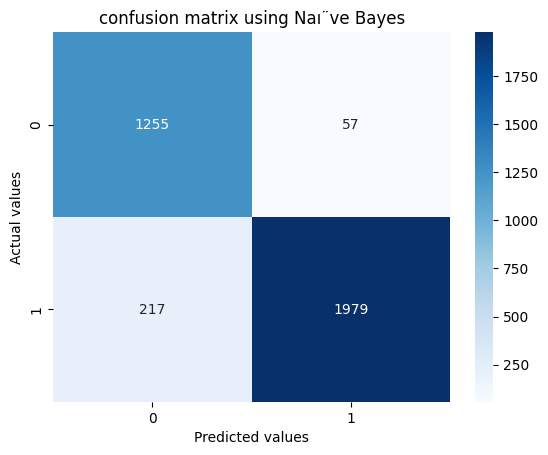

In [ ]:
cm=confusion_matrix(Y_test,nb_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Naı¨ve Bayes')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200,random_state=42)
lr.fit(X_train,Y_train)
lr_y_predictions=lr.predict(X_test)

In [ ]:
lr_accuracy=accuracy_score(Y_test,lr_y_predictions)
lr_precision=precision_score(Y_test,lr_y_predictions)
lr_recall=recall_score(Y_test,lr_y_predictions)
lr_f1score=f1_score(Y_test,lr_y_predictions)
lr_auc_roc_score=roc_auc_score(Y_test,lr_y_predictions)
print('Model -  Logistic Regression:')
print(f'Accuracy score : {lr_accuracy}')
print(f'Recall score : {lr_recall}')
print(f'Precision score : {lr_precision}')
print(f'F1 score : {lr_f1score}')
print(f'ROC AUC score: {lr_auc_roc_score}')

Model -  Logistic Regression:
Accuracy score : 0.9677879133409351
Recall score : 0.9685792349726776
Precision score : 0.9797328420082911
F1 score : 0.9741241126631555
ROC AUC score: 0.9675213248034119


In [ ]:
print('classification report:')
print(classification_report(Y_test,lr_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1312
           1       0.98      0.97      0.97      2196

    accuracy                           0.97      3508
   macro avg       0.96      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



Text(0.5, 1.0, 'confusion matrix using Logistic Regression')

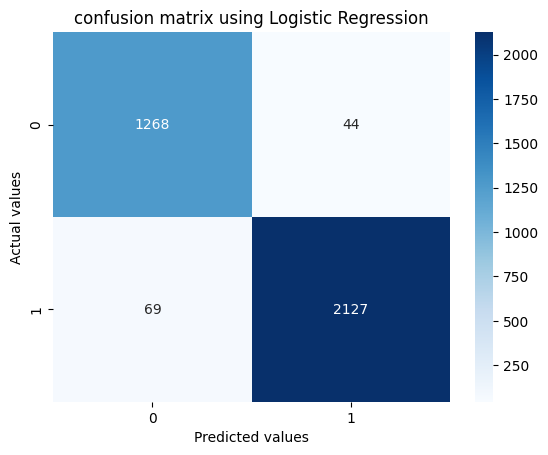

In [ ]:
cm=confusion_matrix(Y_test,lr_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Logistic Regression')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=15,n_estimators=50)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train,Y_train)
rf_y_predictions=rf.predict(X_test)
rf_accuracy=accuracy_score(Y_test,rf_y_predictions)
rf_precision=precision_score(Y_test,rf_y_predictions)
rf_recall=recall_score(Y_test,rf_y_predictions)
rf_f1score=f1_score(Y_test,rf_y_predictions)
rf_auc_roc_score=roc_auc_score(Y_test,rf_y_predictions)
print('Model -  Random Forest:')
print(f'Accuracy score : {rf_accuracy}')
print(f'Recall score : {rf_recall}')
print(f'Precision score : {rf_precision}')
print(f'F1 score : {rf_f1score}')
print(f'ROC AUC score: {rf_auc_roc_score}')

Model -  Random Forest:
Accuracy score : 0.9680729760547321
Recall score : 0.9776867030965392
Precision score : 0.9714932126696832
F1 score : 0.9745801180208806
ROC AUC score: 0.9648342052068062


In [ ]:
print('classification report:')
print(classification_report(Y_test,rf_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1312
           1       0.97      0.98      0.97      2196

    accuracy                           0.97      3508
   macro avg       0.97      0.96      0.97      3508
weighted avg       0.97      0.97      0.97      3508



Text(0.5, 1.0, 'confusion matrix using Logistic Regression')

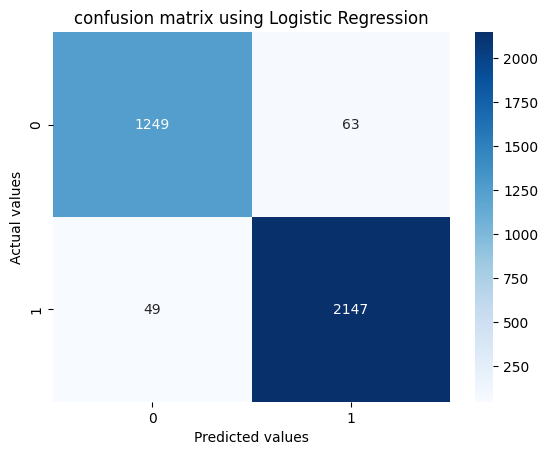

In [ ]:
cm=confusion_matrix(Y_test,rf_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Logistic Regression')

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(X_train,Y_train)

SVC(random_state=42)

In [ ]:
svm_y_predictions=svm.predict(X_test)
svm_accuracy=accuracy_score(Y_test,svm_y_predictions)
svm_precision=precision_score(Y_test,svm_y_predictions)
svm_recall=recall_score(Y_test,svm_y_predictions)
svm_f1score=f1_score(Y_test,svm_y_predictions)
svm_auc_roc_score=roc_auc_score(Y_test,svm_y_predictions)
print('Model -  Support Vector Machine:')
print(f'Accuracy score : {svm_accuracy}')
print(f'Recall score : {svm_recall}')
print(f'Precision score : {svm_precision}')
print(f'F1 score : {svm_f1score}')
print(f'ROC AUC score: {svm_auc_roc_score}')

Model -  Support Vector Machine:
Accuracy score : 0.9717787913340935
Recall score : 0.9722222222222222
Precision score : 0.9825126553152324
F1 score : 0.9773403524834058
ROC AUC score: 0.9716294037940381


In [ ]:
print('classification report:')
print(classification_report(Y_test,svm_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1312
           1       0.98      0.97      0.98      2196

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



Text(0.5, 1.0, 'confusion matrix using Logistic Regression')

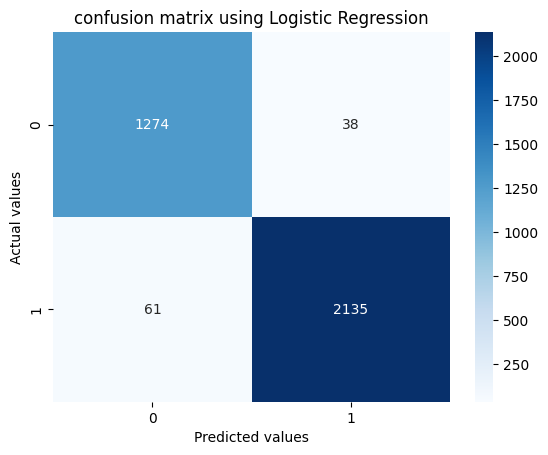

In [ ]:
cm=confusion_matrix(Y_test,svm_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Logistic Regression')